In [1]:
from heat_pinn import *
TIMER_REPEAT_TIMES = 10


Using backend: tensorflow.compat.v1

2021-12-13 16:45:55.738077: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
non-resource variables are not supported in the long term






train_bc_points shape (240, 2)
train_points shape (2780, 2)
train_next_batch shape (3020, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

Compiling model...
Building feed-forward neural network...
'build' took 0.029102 s

'compile' took 0.191945 s

Initializing variables...


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-13 16:45:57.325773: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-13 16:45:57.326360: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-13 16:45:57.328867: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-12-13 16:45:57.328880: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: radian-ubuntu
2021-12-13 16:45:57.328884: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: radian-ubuntu
2021-12-13 16:45:57.328949: I

Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.34e-02, 2.08e-02, 7.11e-01]    [6.43e-02, 2.08e-02, 7.11e-01]    []  
1000      [1.38e-03, 1.03e-03, 3.73e-04]    [8.59e-04, 1.03e-03, 3.73e-04]    []  
2000      [6.42e-04, 1.12e-04, 3.34e-05]    [5.28e-04, 1.12e-04, 3.34e-05]    []  
3000      [7.96e-05, 2.66e-05, 1.41e-05]    [5.33e-05, 2.66e-05, 1.41e-05]    []  
4000      [4.63e-05, 1.43e-05, 6.86e-06]    [2.89e-05, 1.43e-05, 6.86e-06]    []  
5000      [3.22e-05, 8.60e-06, 3.49e-06]    [1.90e-05, 8.60e-06, 3.49e-06]    []  
6000      [2.46e-05, 5.45e-06, 1.94e-06]    [1.42e-05, 5.45e-06, 1.94e-06]    []  
7000      [1.96e-05, 3.63e-06, 1.18e-06]    [1.11e-05, 3.63e-06, 1.18e-06]    []  
8000      [1.81e-05, 2.54e-06, 7.90e-07]    [1.01e-05, 2.54e-06, 7.90e-07]    []  
9000      [2.02e-05, 2.30e-06, 6.69e-07]    [1.45e-05, 2.30e-06, 6.69e-07]    []  
10000     [5.96e-05, 5.46e-06, 1.22e-06]    [4.86e-05, 5.46e-

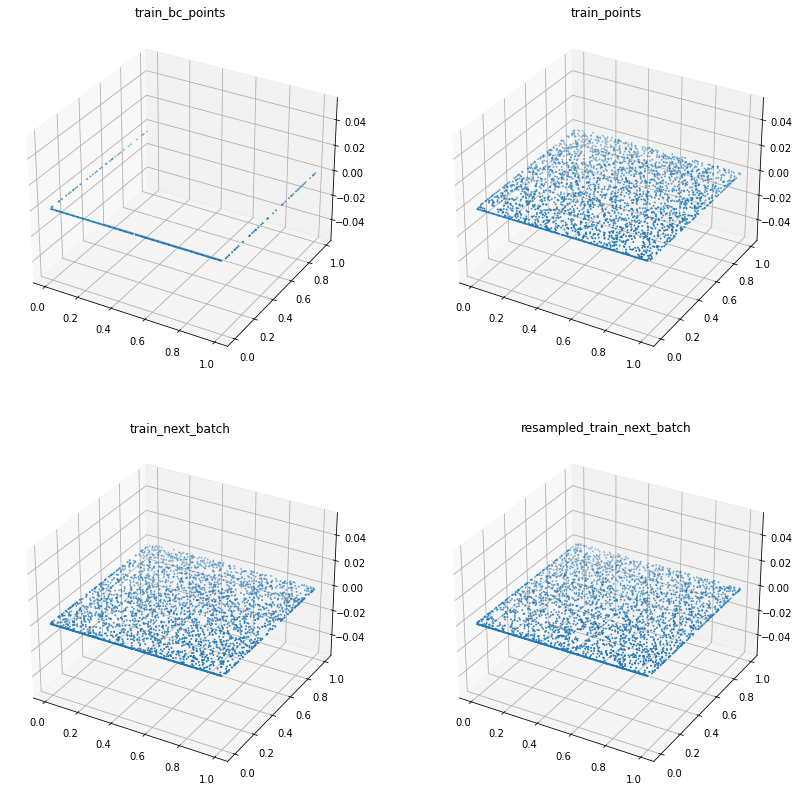

In [2]:
# Train best PINN model
const_params = PinnConstParam()
test_params = PinnTestParam()

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)
losshistory, train_state = train_model(model)


heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0001 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0021 seconds
NN prediction: Average time with 25 tries: 0.0009 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  0.00011815978705038325
Mean squared error:  2.137062220290941e-08
Max error:  0.00031068655212002083
--- NN vs Analytical Report ---
Mean absolute error:  0.00014882710503480752
Mean squared error:  4.207560294387656e-08
Max error:  0.0009856671094894385
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 30
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson



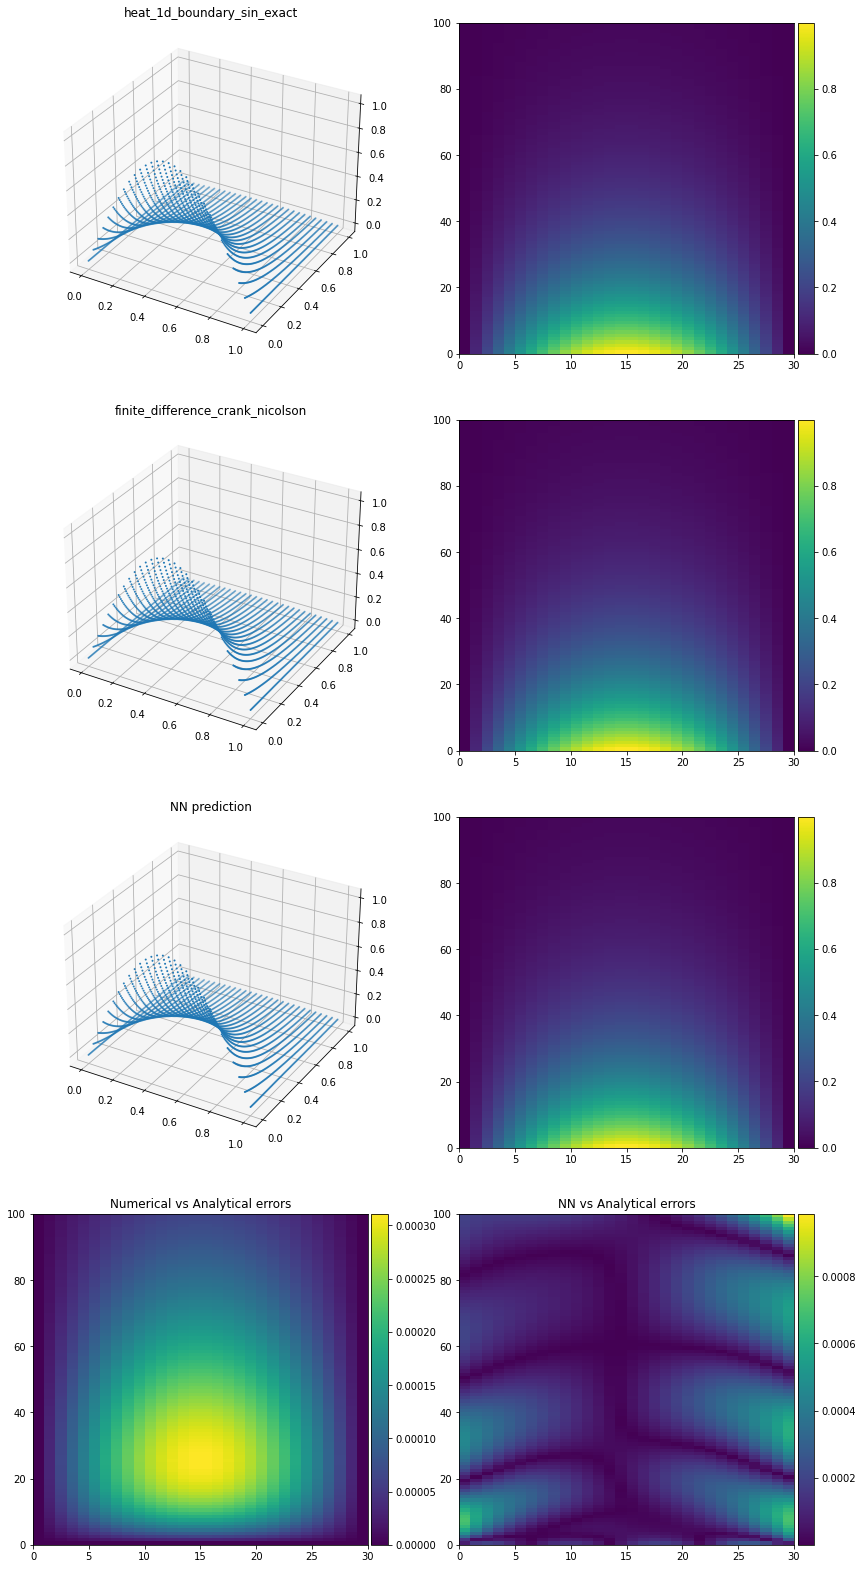

In [3]:
# Find some good numerical solution

const_params.test_x_dim = 30
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_crank_nicolson"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)


heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0003 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0292 seconds
NN prediction: Average time with 25 tries: 0.0012 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  1.6081942338127432e-05
Mean squared error:  3.8394288026295904e-10
Max error:  4.111431766423701e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.00014361998745770729
Mean squared error:  3.880259096320047e-08
Max error:  0.0009855479001998878
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 200
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson



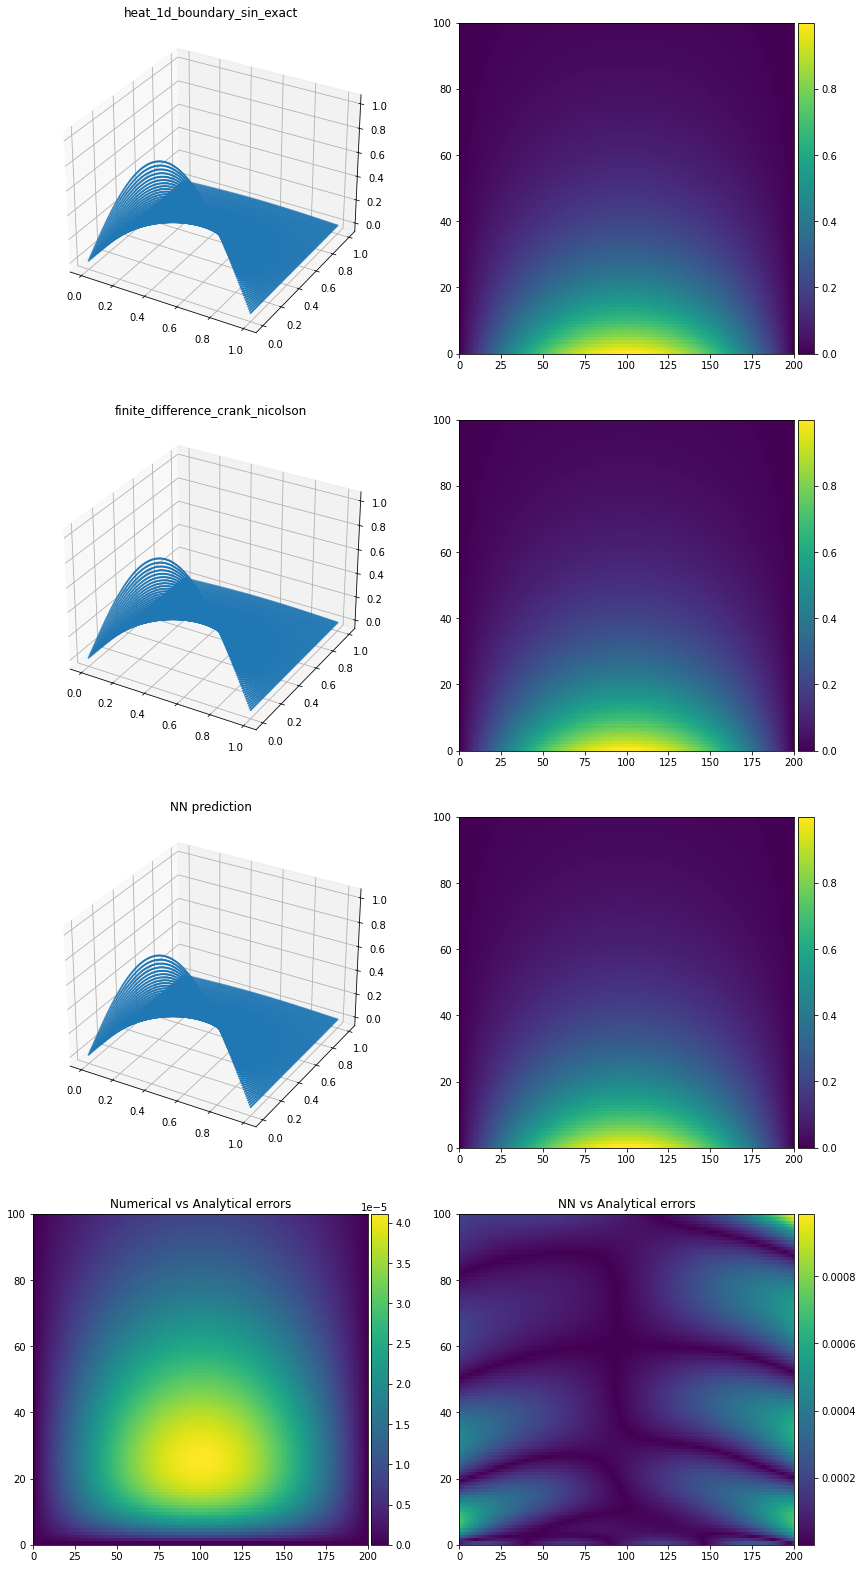

In [4]:
# Find bad numerical solution

const_params.test_x_dim = 200
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_crank_nicolson"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)


heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0049 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.5446 seconds
NN prediction: Average time with 25 tries: 0.0199 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  1.1472653100163591e-06
Mean squared error:  1.9374791423653567e-12
Max error:  2.905616326487337e-06
--- NN vs Analytical Report ---
Mean absolute error:  0.00014299504255781004
Mean squared error:  3.84371488052541e-08
Max error:  0.0009856671094894385
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 300
test_t_dim: 1000
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson



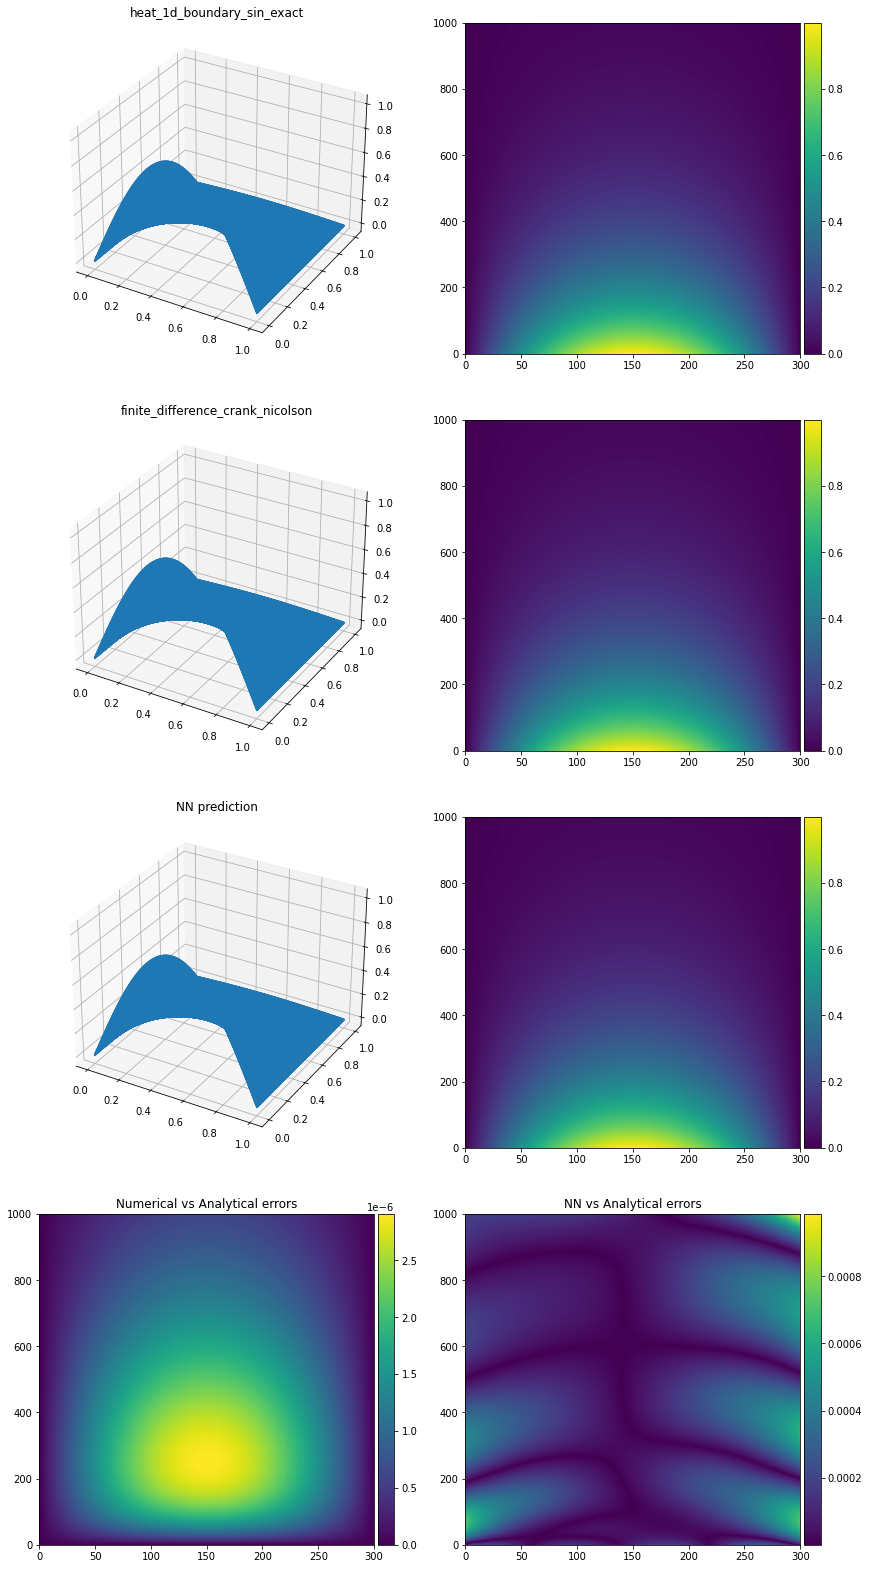

In [5]:
# A high resolution example where both should be good
const_params.test_x_dim = 300
const_params.test_t_dim = 1000
const_params.numerical_function_name = "finite_difference_crank_nicolson"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)


heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0002 seconds
finite_difference_euler: Average time with 25 tries: 0.0002 seconds
NN prediction: Average time with 25 tries: 0.0007 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  0.05803205971431045
Mean squared error:  0.0065539323063172955
Max error:  0.23134047963561372
--- NN vs Analytical Report ---
Mean absolute error:  0.00017244964181556974
Mean squared error:  5.817893258562428e-08
Max error:  0.0009856671094894385
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 7
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_euler



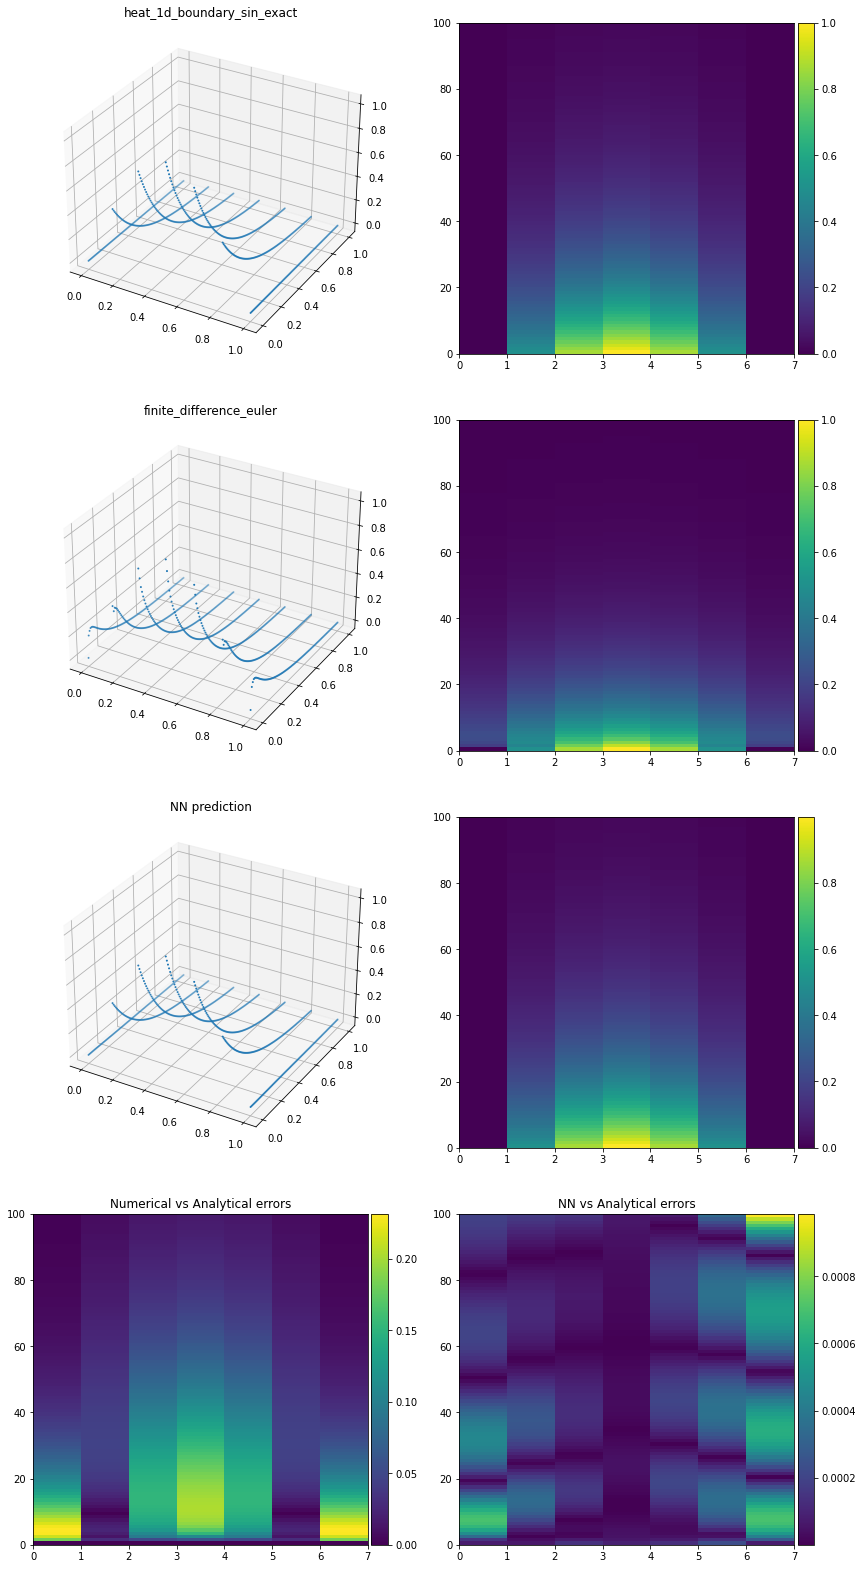

In [6]:
# Find some good numerical solution

const_params.test_x_dim = 7
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_euler"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)

heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0002 seconds
finite_difference_euler: Average time with 25 tries: 0.0003 seconds
NN prediction: Average time with 25 tries: 0.0007 seconds
--- Numerical vs Analytical Report ---
Mean absolute error:  3.420134649046916e+144
Mean squared error:  1.3258164460146749e+291
Max error:  5.112220512603563e+146
--- NN vs Analytical Report ---
Mean absolute error:  0.00014882710503480752
Mean squared error:  4.207560294387656e-08
Max error:  0.0009856671094894385
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 30
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_euler



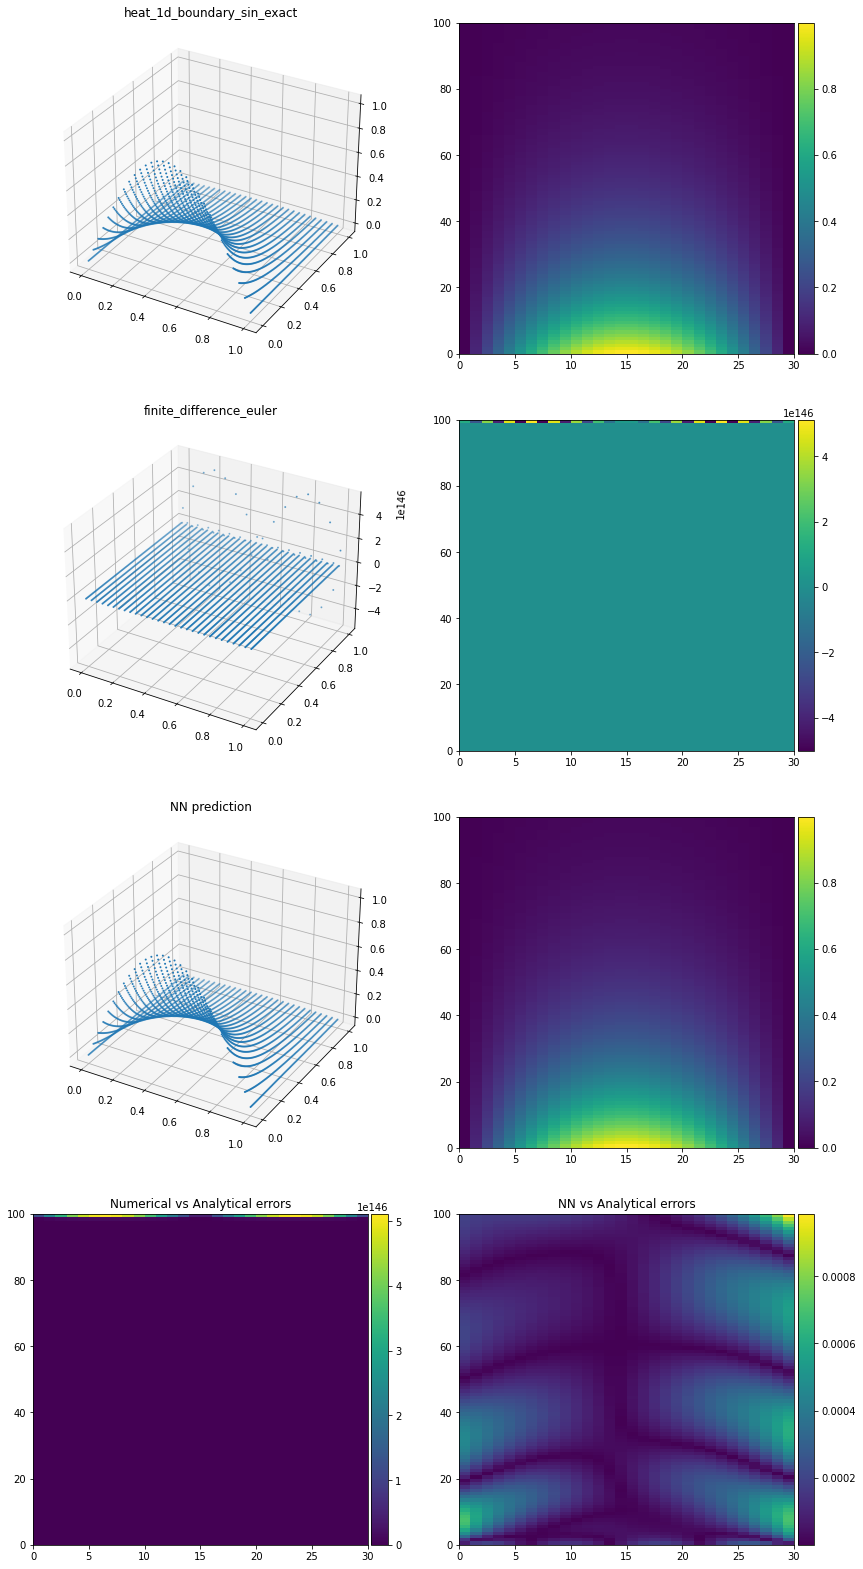

In [7]:
# Find bad numerical solution

const_params.test_x_dim = 30
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_euler"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)